## 180. Consecutive Numbers



**Change Log**   

| Date | Description |
| ---------- | ---------- |
| 2022-04-11 | Initialize |



## Summary

Find all numbers tha appear at least 3 times in a row (consecutively).

#### SQL Schema

```sql
Create table If Not Exists Logs (id int, num int)
Truncate table Logs
insert into Logs (id, num) values ('1', '1')
insert into Logs (id, num) values ('2', '1')
insert into Logs (id, num) values ('3', '1')
insert into Logs (id, num) values ('4', '2')
insert into Logs (id, num) values ('5', '1')
insert into Logs (id, num) values ('6', '2')
insert into Logs (id, num) values ('7', '2')

```

Table: Logs

```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| id          | int     |
| num         | varchar |
+-------------+---------+
```
id is the primary key for this table.  


## Problem

Write an SQL query to find all numbers that appear at least three times consecutively.

Return the result table in **any order**.

The query result format is in the following example.

 

#### Example 1:

**Input:** 
```
Logs table:
+----+-----+
| id | num |
+----+-----+
| 1  | 1   |
| 2  | 1   |
| 3  | 1   |
| 4  | 2   |
| 5  | 1   |
| 6  | 2   |
| 7  | 2   |
+----+-----+
```
**Output:**
```
+-----------------+
| ConsecutiveNums |
+-----------------+
| 1               |
+-----------------+
```

**Explanation**: 1 is the only number that appears consecutively for at least three times.

--- 

--- 

## Solution 1 - MSSQL

SQL Server (T-SQL) has the LAG() and LEAD() functions which allow accessing previous and subsequent rows repspectively: 

LAG() will allow access a previous, or other previous row based on offset.    

LEAD() will allow accessing a subsequent, or other subsequent row based on offset.

#### The Plan:
Select a row, and the previous two rows using LAG() and then filter where all three rows are the same.


```sql
/* Write your T-SQL query statement below */
SELECT      DISTINCT num AS ConsecutiveNums
FROM        (
            SELECT      L0.num
                        , LAG(num,1) OVER(ORDER BY id) AS numlag1
                        , LAG(num,2) OVER(ORDER BY id) AS numlag2
            FROM        Logs L0
            
            ) AS connums
WHERE       num = numlag1
            AND num = numlag2
```

### Result

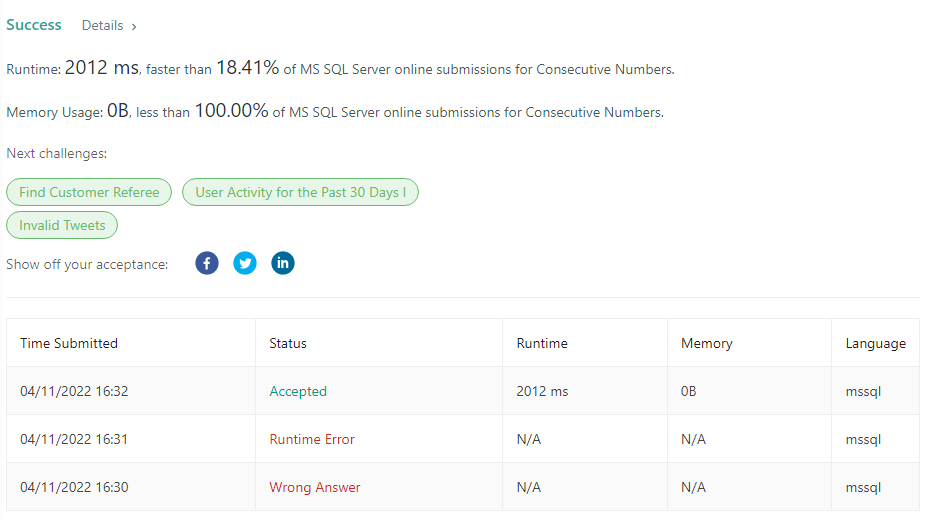



The results really suck.  Especially given how small the dataset is.

--- 

## Solution 2 - MSSQL - Use LAG() and LEAD()

Since the performance is so bad.  We are going to try using both LAG() and LEAD().



```sql
SELECT      DISTINCT num AS ConsecutiveNums
FROM        (
            SELECT      L0.num
                        , LAG(num,1) OVER(ORDER BY id) AS numlag1
                        , LEAD(num,1) OVER(ORDER BY id) AS numlead1
            FROM        Logs L0
            
            ) AS connums
WHERE       num = numlag1
            AND num = numlead1
```

### Result

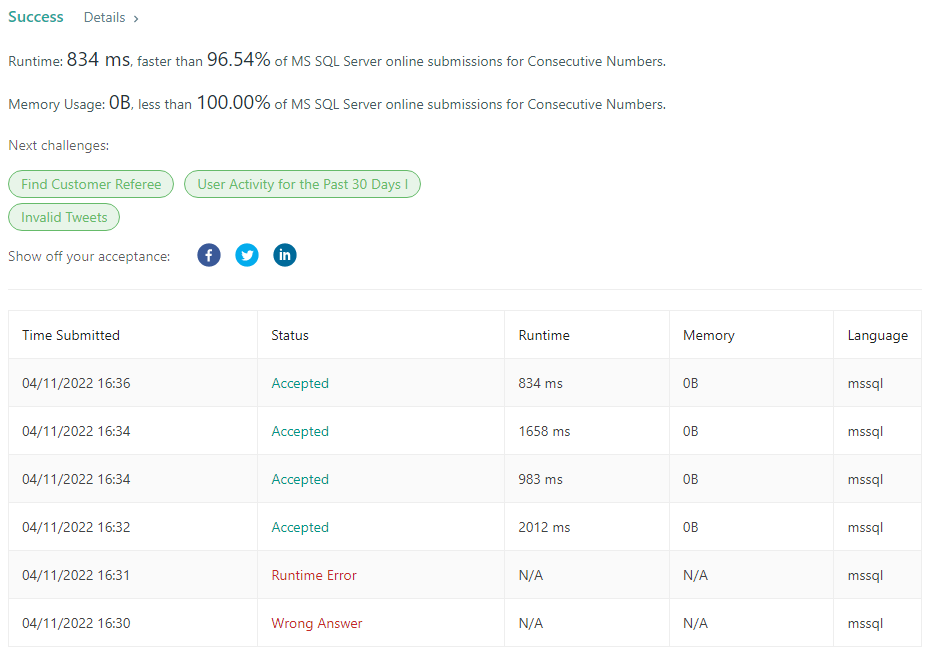

Results look similar, with same wide variance in performance. 1658ms and 834ms vs solution 1 with 2012ms and 983ms 

--- 

## Solution 3 - MySQL 

Pretty much the same thing in MySQL.  Note though we have to `escape` the alias name.  This may be because `rank` is a reserved word.

```sql
# Write your MySQL query statement below
SELECT      num AS ConsecutiveNums
FROM        (
            SELECT      L0.num
                        , LAG(num,1) OVER() AS numlag1
                        , LAG(num,2) OVER() AS numlag2
            FROM        Logs L0
            
            ) AS connums
WHERE       num = numlag1
            AND num = numlag2
;

```



### Result

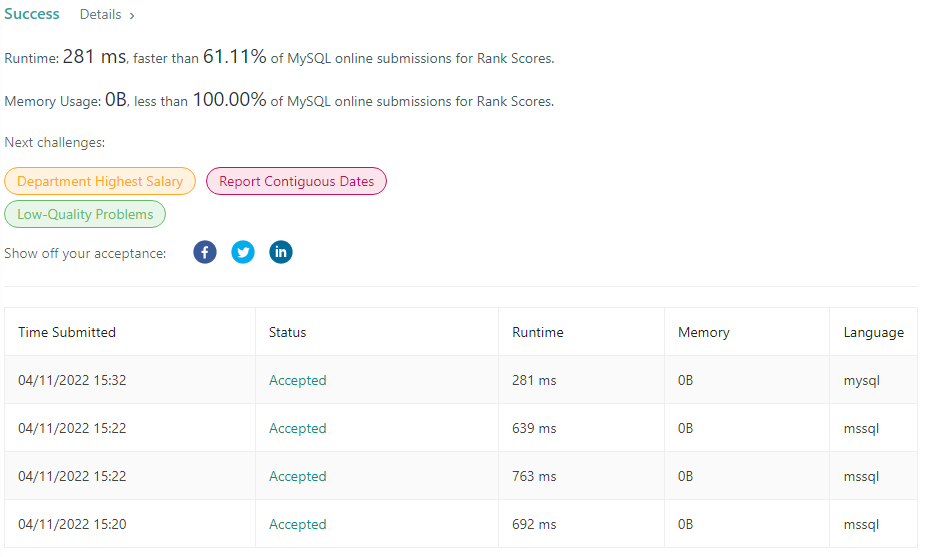




As usual MySQL is kicking butt on MSSQL.

--- 
